In [92]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt


提取data2的数据

In [93]:
path = 'data/ex7data2.mat'
data2 = sio.loadmat(path)

编写计算各个点归属于哪个类和cost的函数

In [94]:
def findClosestCentroids(X, centroids):
    c_i = np.zeros(X.shape[0])
    J = 0
    for i in range(X.shape[0]):
        dis = np.inf
        for j in range(centroids.shape[0]):
            temp_dis = 0
            for z in range(X.shape[1]):
                temp_dis = temp_dis + (X[i, z] - centroids[j, z])**2
            if temp_dis < dis:
                dis = temp_dis
                c_i[i] = j + 1
        J = J + temp_dis 
    return c_i, J / X.shape[0]

#编写测试函数
# X = data2['X']
# init_centriods = np.array([3, 3, 6, 2, 8, 5]).reshape((3,2))
# hah, J = findClosestCentroids(X, init_centriods)
# print(hah)

编写计算分得的类的中心点的函数

In [95]:
def computeCentroids(c_i, X, K):
    data = pd.DataFrame(X)
    data['cluster'] = c_i
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        group = data[data['cluster'].isin([i + 1])]
        for z in range(X.shape[1]):
            centroids[i, z] = np.mean(group[z])
    return centroids
    
#测试函数功能
# X = data2['X']
# init_centriods = np.array([3, 3, 6, 2, 8, 5]).reshape((3,2))
# c_i, J = findClosestCentroids(X, init_centriods)
# haha = computeCentroids(c_i, X, K= 3)
# print(haha)
  

编写画出X的分类图

In [96]:
def plot_cluster(X, c_i, K, fig, ax):
    data = pd.DataFrame(X, columns=['X', 'Y'])
    data['cluster'] = c_i
    # fig, ax = plt.subplots(figsize = (12,8))
    mycolor = ['#FF0000', '#00FF00', '#0000FF']
    for i in range(K):
        group = data[data['cluster'].isin([i + 1])]
        ax.scatter(group['X'], group['Y'], marker = '+', c= mycolor[i])
        
#测试函数
# X = data2['X']
# init_centriods = np.array([3, 3, 6, 2, 8, 5]).reshape((3,2))
# c_i, J = findClosestCentroids(X, init_centriods)
# plot_cluster(X, c_i, 3)
# plt.show()


画出centroid的图像

In [97]:
def plot_centriod(centroid, fig, ax):
    # fig, ax = plt.subplots(figsize = (12,8))
    mycolor = ['#FF0000', '#00FF00', '#0000FF']
    for i in range(centroid.shape[0]):
        ax.scatter(centroid[i, 0], centroid[i, 1], c= mycolor[i], marker= 'o', linewidth= 10)

#测试函数功能
# X = data2['X']
# init_centriods = np.array([3, 3, 6, 2, 8, 5]).reshape((3,2))
# c_i, J = findClosestCentroids(X, init_centriods)
# centroid = computeCentroids(c_i, X, K= 3)
# plot_centriod(centroid)

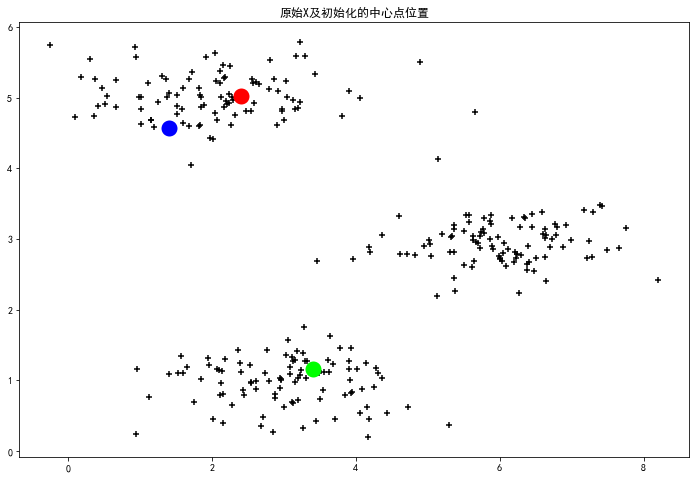

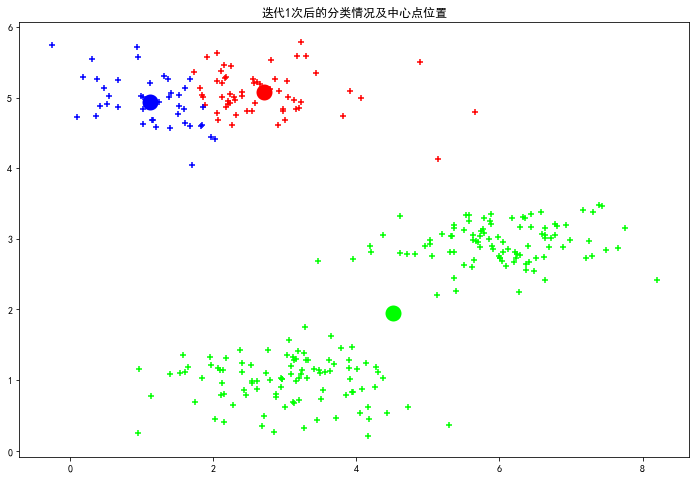

In [98]:
def train_Kmeans(X, K, max_iters):
    #先画出原始的X图像
    fig, ax = plt.subplots(figsize = (12,8))
    ax.scatter(X[:, 0], X[:, 1], c= 'black', marker= '+')
    
    init_centriods_id = np.random.choice(range(X.shape[0]), K)
    centriods = data2['X'][init_centriods_id]

    plot_centriod(centriods, fig, ax)
    #让标题可以显示中文的设置
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title('原始X及初始化的中心点位置')
    plt.show()
    J = np.inf
    for i in range(max_iters):
        
        c_i, J_temp = findClosestCentroids(X, centriods)
        if J_temp < J:
            J = J_temp
            fig, ax = plt.subplots(figsize = (12,8))
            plot_cluster(X, c_i, K, fig, ax)
            centriods = computeCentroids(c_i, X, K)
            plot_centriod(centriods, fig, ax)
            plt.title('迭代' + str(i + 1) + '次后的分类情况及中心点位置')
            plt.show()
        else:
            break
    
#测试函数功能
train_Kmeans(data2['X'], 3, 10)

加载图像数据

In [99]:
from skimage import io

path_bird = 'data/bird_small.png'
path_me = 'data/me.jpg'
bird = io.imread(path_bird)
me = io.imread(path_me)
print(me.shape)

(200, 150, 3)


压缩图片

In [100]:
def compress(data, K, max_iters, RGB_space):
    data = data / 255  
    X = np.reshape(data, (data.shape[0] * data.shape[1], RGB_space))
    #初始化中心点
    init_centriods_id = np.random.choice(range(X.shape[0]), K)
    centriods = X[init_centriods_id, :]
    J = np.inf
    for i in range(max_iters):
        c_i, J_temp = findClosestCentroids(X, centriods)
        if J_temp < J:
            J = J_temp
            centriods = computeCentroids(c_i, X, K)            
        else:
            break
    c_i, J_temp = findClosestCentroids(X, centriods)
    #把c_i的下标索引和centriods匹配
    c_i = c_i - 1
    X_recovered = centriods[c_i.astype(int),:]
    X_recovered = np.reshape(X_recovered, (data.shape[0], data.shape[1], data.shape[2]))
    
    plt.subplot(121)
    plt.title('原图')
    plt.imshow(data)
    
    plt.subplot(122)
    plt.title('聚成'+ str(K) + '类后的图')
    plt.imshow(X_recovered)
    
    plt.show()
    

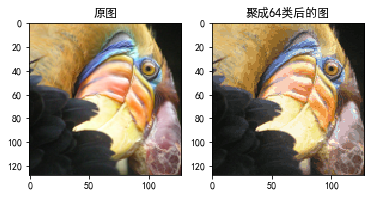

In [101]:
K = 64; 
max_iters = 10
#compress(bird, K, max_iters, bird.shape[2])
compress(bird, K, max_iters, me.shape[2])
